Processing movie: ant-man
Processing movie: aquaman
Processing movie: avengers-infinity-war
Processing movie: black-panther
Processing movie: cars-2
Processing movie: coraline
Processing movie: fantastic-mr-fox
Processing movie: guardians-of-the-galaxy
Processing movie: guardians-of-the-galaxy-2
Processing movie: incredibles
Processing movie: lotr-1
Processing movie: lotr-2
Processing movie: megamind
Processing movie: sesame-street-episode-3990
Processing movie: shrek-the-third
Processing movie: spider-man-3-homecoming
Processing movie: spider-man-far-from-home
Processing movie: the-martian
Processing movie: thor-ragnarok
Processing movie: toy-story
Processing movie: venom


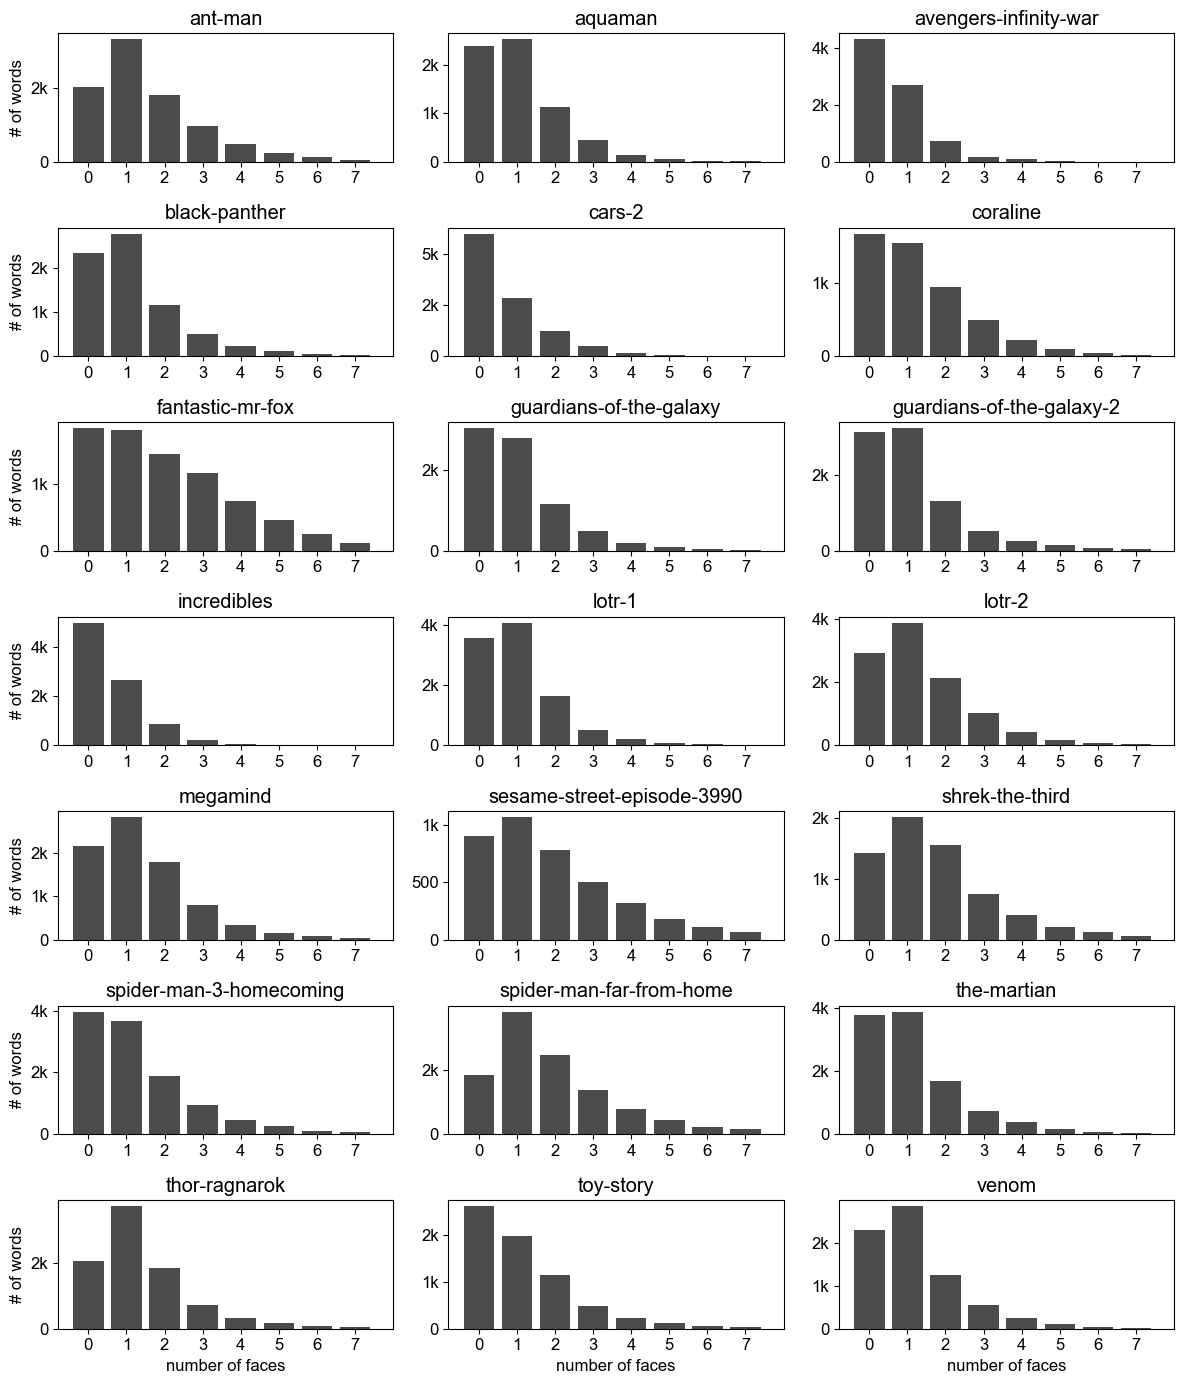

In [58]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
font_path = 'font_arial.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 12})

# Get all features.csv files from subdirectories
feature_files = glob.glob('braintreebank/transcripts/*/features.csv')

# Create a subplot grid for all movies (3 columns x 7 rows)
n_movies = len(feature_files)
fig, axes = plt.subplots(7, 3, figsize=(12, 14))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Plot histogram for each movie
for idx, feature_file in enumerate(feature_files):
    if idx >= len(axes):
        break
    ax = axes[idx]
        
    # Get movie name from directory path
    movie_name = os.path.basename(os.path.dirname(feature_file))
    print("Processing movie:", movie_name)
    # Load data
    df = pd.read_csv(feature_file)
    
    # Plot histogram
    ax.hist(df['face_num'].values, bins=np.arange(0, 9, 1)-0.4, 
            alpha=0.7, width=0.8, color='black')
    ax.set_title(f'{movie_name}')
    ax.set_xticks(np.arange(0, 8, 1))
    if idx >= len(axes) - 3:  # Only for bottom row
        ax.set_xlabel('number of faces')
    if idx % 3 == 0:  # Only for first column
        ax.set_ylabel('# of words')
    
    # Format y-axis labels to use k notation
    yticks = ax.get_yticks()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k' if x >= 1000 else str(int(x))))

# Hide any empty subplots
for idx in range(len(feature_files), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()

os.makedirs('figures', exist_ok=True)
plt.savefig('figures/num_faces_histograms.pdf', bbox_inches='tight', dpi=300)